In [ ]:
!pip install scikit-optimize

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from skopt import BayesSearchCV
from skopt.space import Integer, Real
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data_path = ('..\combined_keypoints.csv')
df = pd.read_csv(data_path)


X = df.drop(columns=['Class'])
y = df['Class']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

knn = KNeighborsClassifier(algorithm='brute', metric='minkowski', weights='distance')


param_space = {
    'n_neighbors': Integer(1, 10),
    'leaf_size': Integer(10, 50),
    'p': Real(1, 3)
}


bayes_search = BayesSearchCV(
    knn,
    search_spaces=param_space,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

bayes_search.fit(X_train, y_train)

best_params = bayes_search.best_params_
best_score = bayes_search.best_score_
print(f"Best parameters found: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
best_knn = bayes_search.best_estimator_
best_knn.fit(X_train, y_train)
print("Training completed with the best hyperparameters.")
print(f"Best model: {best_knn}")


Training completed with the best hyperparameters.
Best model: KNeighborsClassifier(algorithm='brute', leaf_size=50, n_neighbors=4,
                     p=1.3254197757648285, weights='distance')


In [ ]:
y_pred = best_knn.predict(X_test)



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.6937
Precision: 0.7065
Recall: 0.6937
F1 Score: 0.6919


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
                                precision    recall  f1-score   support

       Bharadvaja's_Twist_pose       0.76      0.57      0.65        23
                          Boat       0.83      0.85      0.84        47
                   Bound_Angle       0.69      0.68      0.68        37
           Bow_or_Dhanurasana_       1.00      0.83      0.91        30
                        Bridge       0.96      0.85      0.90        27
                         Camel       0.91      0.89      0.90        36
                       Cat_Cow       0.90      0.96      0.93        47
                         Chair       0.63      0.73      0.68        37
                         Child       0.79      0.94      0.86        35
                         Cobra       0.76      0.86      0.81        94
                      Cockerel       0.45      0.50      0.48        20
                        Corpse       0.51      0.61      0.56        31
                      Cow_Face       0.6

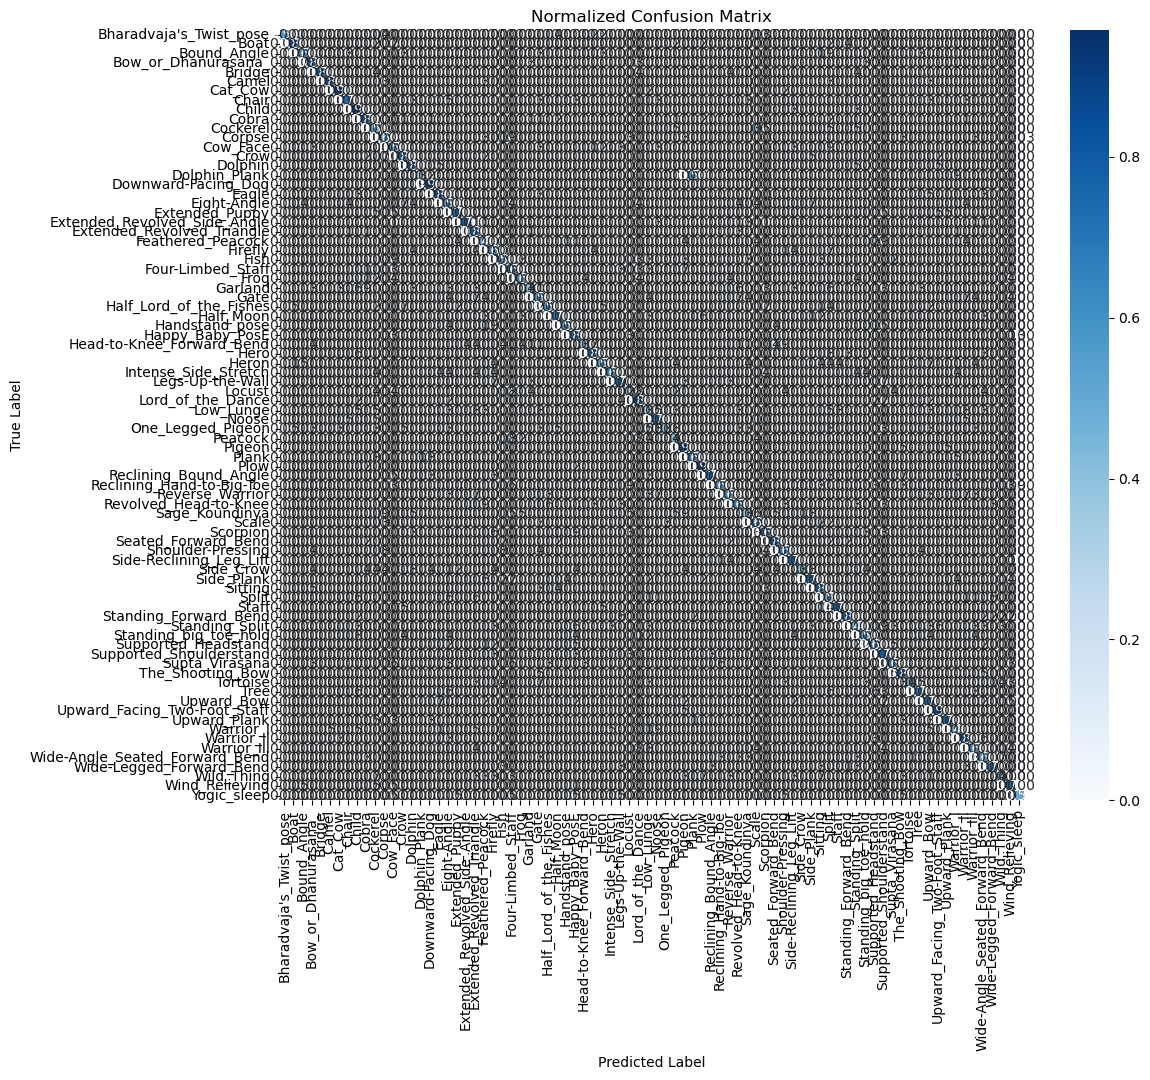

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()